<a href="https://colab.research.google.com/github/sirfara12/PCVK25_3G_26/blob/main/Week9_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TUGAS PRAKTIKUM



*   Nama : Sirfaratih
*   NIM : 2341720072



In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt install tesseract-ocr -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [ ]:

!pip install pytesseract

In [ ]:

import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

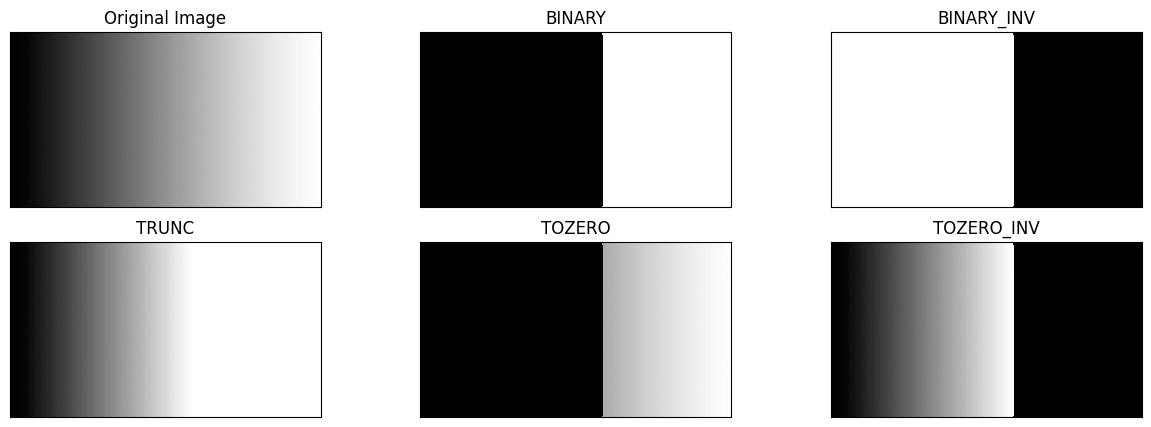

In [ ]:
filename = '/content/drive/MyDrive/SEMESTER 5/PCVK/gradient.jpg'
img = cv.imread(filename, cv.IMREAD_GRAYSCALE)

thresh1 = img.copy()
thresh2 = img.copy()
thresh3 = img.copy()
thresh4 = img.copy()
thresh5 = img.copy()

# Nilai threshold yang ditentukan
thresh = 170

# 1. Binary Threshold
thresh1[img > thresh] = 255
thresh1[img <= thresh] = 0

# 2. Binary Inverse Threshold
thresh2[img > thresh] = 0
thresh2[img <= thresh] = 255

# 3. Truncate Threshold
thresh3[img > thresh] = thresh

# 4. Tozero Threshold
thresh4[img <= thresh] = 0

# 5. Tozero Inverse Threshold
thresh5[img > thresh] = 0
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()


Nilai threshold Otsu: 167


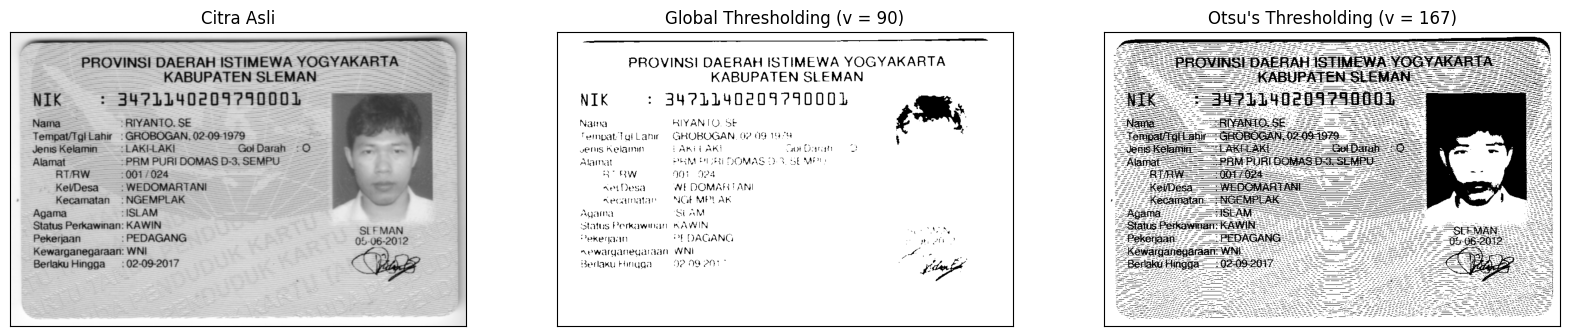

In [ ]:
# Buat Otsu Thresholding tanpa menggunakan Library.

filename = '/content/drive/MyDrive/SEMESTER 5/PCVK/ktp.png'
img = cv.imread(filename, 0)
blur = cv.GaussianBlur(img, (5,5), 0)

def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weight = 1.0/pixel_number
    his, bins = np.histogram(gray, np.arange(0,257))
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)

    for t in range(1, 256):
        pcb = np.sum(his[:t])
        pcf = np.sum(his[t:])

        if pcb == 0 or pcf == 0:
            continue

        Wb = pcb * mean_weight
        Wf = pcf * mean_weight
        mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)

        value = Wb * Wf * (mub - muf) ** 2
        if value > final_value:
            final_thresh = t
            final_value = value

    final_img = gray.copy()
    print("Nilai threshold Otsu:", final_thresh)

    final_img[gray > final_thresh] = 255
    final_img[gray <= final_thresh] = 0
    return final_img, final_thresh

otsu_biner, otsu_thresh = otsu(img)
x = "Otsu's Thresholding (v = " + str(otsu_thresh) + ")"

ret, th1 = cv.threshold(blur, 90, 255, cv.THRESH_BINARY)
titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, otsu_biner]

plt.figure(figsize = (20,15))
for i in range(len(citra3)):
    plt.subplot(1,3,i+1)
    plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()


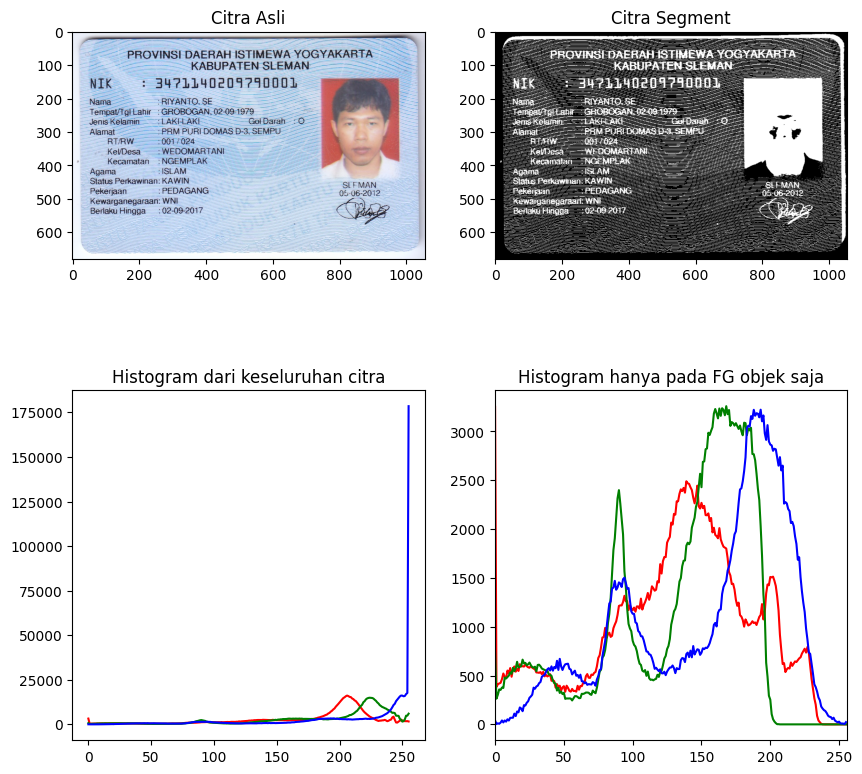

In [ ]:
# Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image ktp Riyanto.jpg

filename = ('/content/drive/MyDrive/SEMESTER 5/PCVK/ktp.png')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
    hist0 = cv.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])
plt.show()

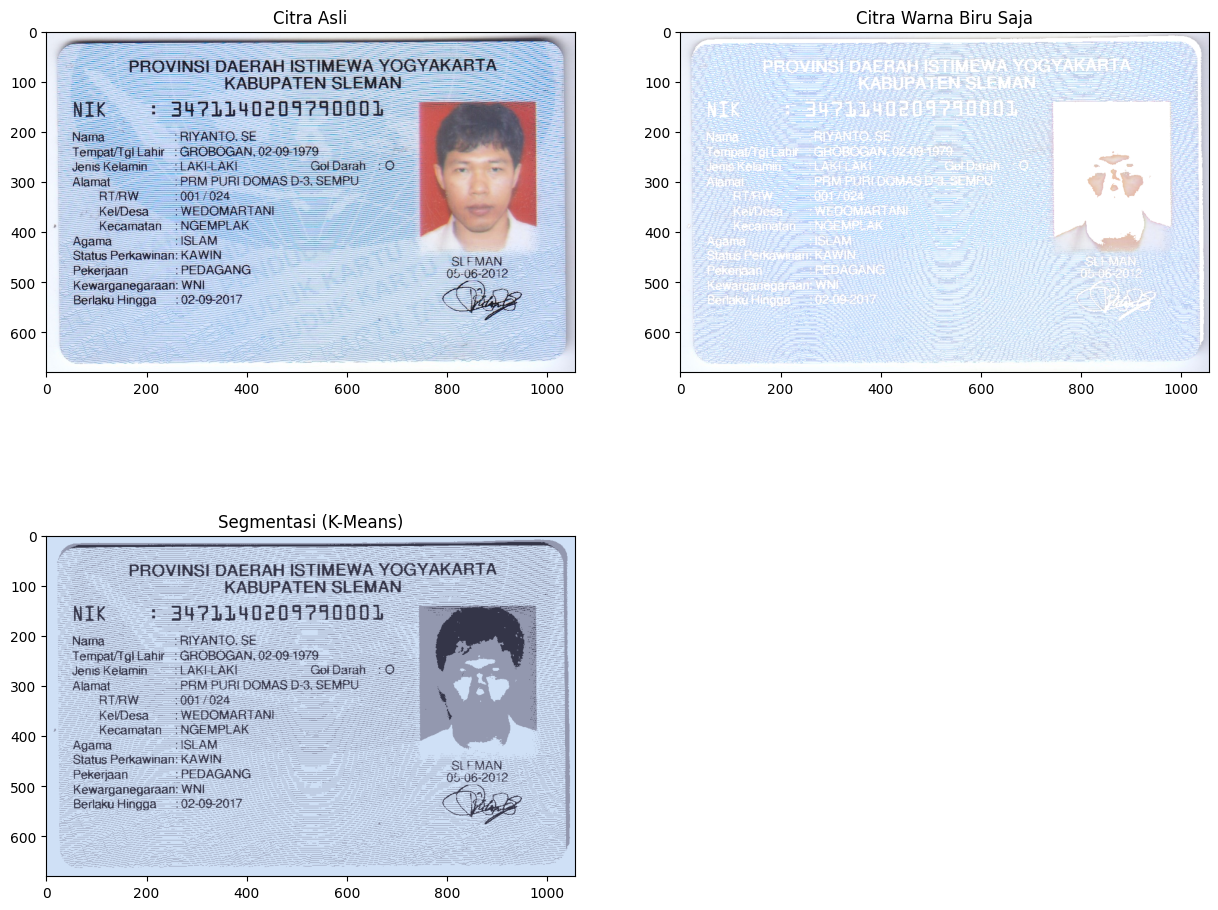

In [ ]:
Filename = ('/content/drive/MyDrive/SEMESTER 5/PCVK/ktp.png')

img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 150, 0.1)

k = 3
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
labels = labels.flatten()

segmented_image = centers[labels]
segmented_image = segmented_image.reshape(img.shape)

blue_index = np.argmax(centers[:, 2])

masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != blue_index] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)

plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1), plt.imshow(img), plt.title('Citra Asli')
plt.subplot(2, 2, 2), plt.imshow(masked_image0), plt.title('Citra Warna Biru Saja')
plt.subplot(2, 2, 3), plt.imshow(segmented_image), plt.title('Segmentasi (K-Means)')
plt.show()

## Proses konversi gambar KTP menjadi teks yang dapat mengenali tulisan.

In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-ind
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 537 kB of archives.
After this operation, 1,138 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 537 kB in 1s (847 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-ind.
(Reading databa

In [ ]:
import cv2
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt

In [ ]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)
    plt.show()

In [ ]:
img = cv2.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/ktp.png')
# Jalankan OCR dengan output dictionary
d = pytesseract.image_to_data(img, output_type=Output.DICT)
# Tampilkan key dictionary hasil OCR
print(d.keys())


dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


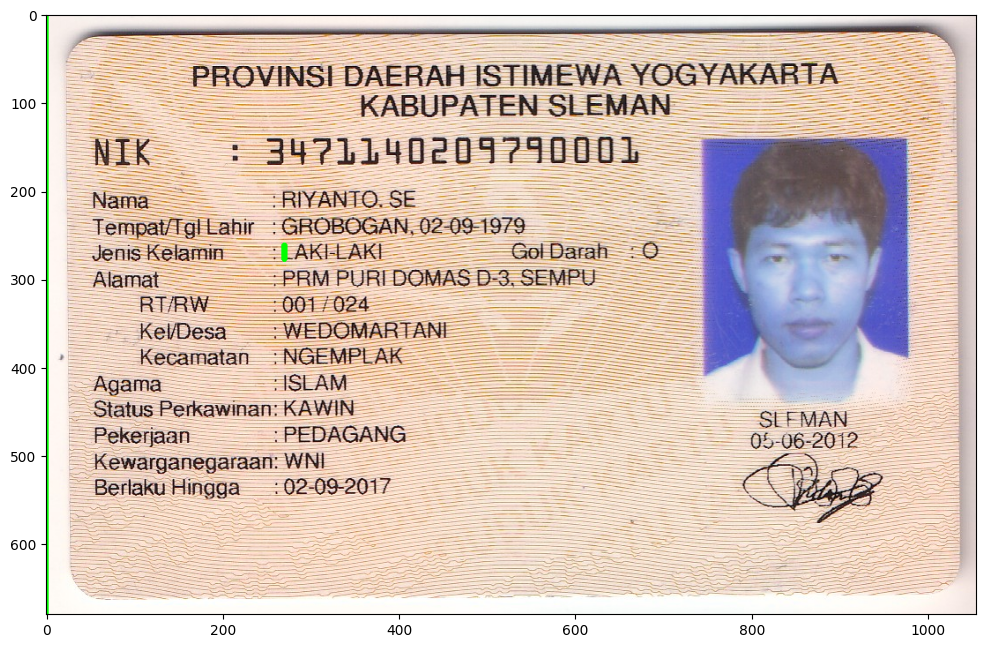

In [ ]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

display(img)

em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 



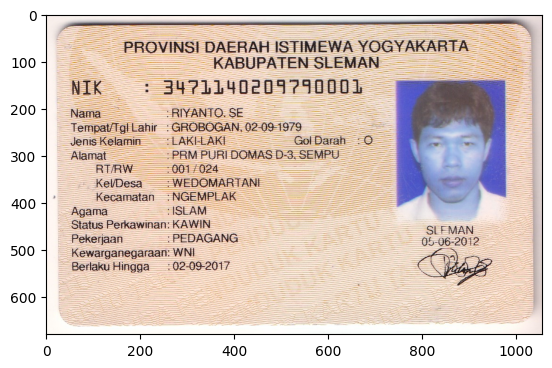

In [ ]:
img = cv2.imread("")
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

## 8. Tugas berikutnya adalah mengimplementasikan hasil citra yang telah diproses dengan  GLOBAL THRESHOLDING dan hasilnya diproses untuk membaca teks yang terdapat pada KTP.

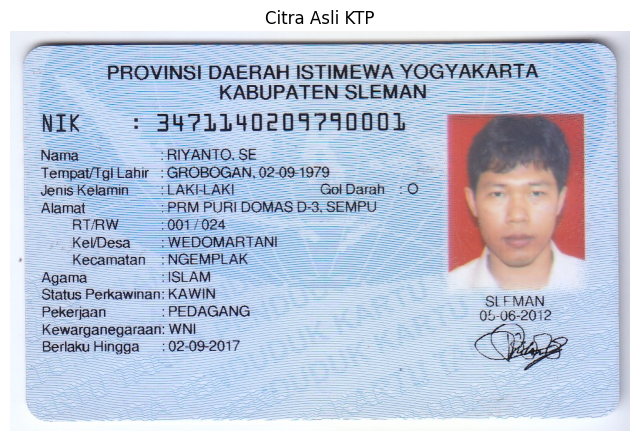

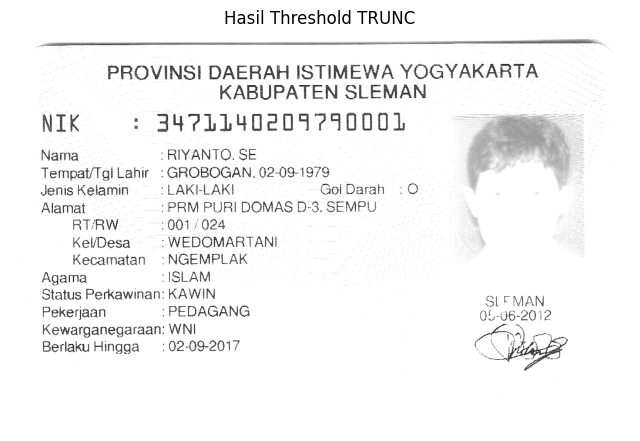

=== HASIL TEKS DARI KTP ===
em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 


=== HASIL EKSTRAKSI KTP ===
NIK: 3471114020979000
Nama: RIYANTO. SE  Tempat
TTL: GROBOGAN. 02-09-1979  Jenis Kelamin
Jenis Kelamin: LAKI
Gol Darah: 0
Alamat: PRM PURI DOMAS D-3. SEMPU RTRW 1001 1024
Kel/Desa: WEDOMARTANI
Kecamatan: NGEMPLAK  Agama
Agama: 
Status: Bean KAWIN SLEMAN Pekerjaan
Pekerjaan: PEDAGANG 05
Kewarganegaraan: WNI HI


In [ ]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from pytesseract import Output
import re

img_path = '/content/drive/MyDrive/SEMESTER 5/PCVK/ktp.png'
img = cv2.imread(img_path)
if img is None:
    raise ValueError("Gambar tidak terbaca! Cek path:", img_path)

plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Citra Asli KTP")
plt.axis('off')
plt.show()

# Konversi ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold TRUNC
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)

plt.figure(figsize=(8,6))
plt.imshow(threshed, cmap='gray')
plt.title("Hasil Threshold TRUNC")
plt.axis('off')
plt.show()


#  OCR dengan output dataframe
text_df = pytesseract.image_to_data(threshed, output_type=Output.DATAFRAME, lang='ind')
text_str = pytesseract.image_to_string(threshed, lang='ind')

print("=== HASIL TEKS DARI KTP ===")
print(text_str)

# Filter hasil OCR yang valid
text_df = text_df[text_df.conf != -1]

# Gabungkan teks per blok
lines = text_df.groupby('block_num')['text'].apply(list)

# Fungsi ekstraksi field KTP
def extract_ktp_fields(text):
    text = text.replace('\n',' ').replace('\r',' ')

    fields = {}
    nik_match = re.search(r'NIK\s*[:\-]?\s*(\d{16})', text)
    fields['NIK'] = nik_match.group(1) if nik_match else "Tidak ditemukan"

    nama_match = re.search(r'Nama\s*[:\-]?\s*([A-Z\s\.]+)', text, re.IGNORECASE)
    fields['Nama'] = nama_match.group(1).strip() if nama_match else "Tidak ditemukan"

    ttl_match = re.search(r'(Tempat/Tgl Lahir|TTL)\s*[:\-]?\s*([\w\s\.,-]+)', text, re.IGNORECASE)
    fields['TTL'] = ttl_match.group(2).strip() if ttl_match else "Tidak ditemukan"

    jk_match = re.search(r'Jenis Kelamin\s*[:\-]?\s*([A-Z\s]+)', text, re.IGNORECASE)
    fields['Jenis Kelamin'] = jk_match.group(1).strip() if jk_match else "Tidak ditemukan"

    gol_match = re.search(r'Gol Darah\s*[:\-]?\s*([A-Z0-9]+)', text, re.IGNORECASE)
    fields['Gol Darah'] = gol_match.group(1).strip() if gol_match else "Tidak ditemukan"

    alamat_match = re.search(r'Alamat\s*[:\-]?\s*([\w\s\.,/-]+)Kel', text, re.IGNORECASE)
    fields['Alamat'] = alamat_match.group(1).strip() if alamat_match else "Tidak ditemukan"

    kel_match = re.search(r'Kel/Desa\s*[:\-]?\s*([\w\s]+)', text, re.IGNORECASE)
    fields['Kel/Desa'] = kel_match.group(1).strip() if kel_match else "Tidak ditemukan"

    kec_match = re.search(r'Kecamatan\s*[:\-]?\s*([\w\s]+)', text, re.IGNORECASE)
    fields['Kecamatan'] = kec_match.group(1).strip() if kec_match else "Tidak ditemukan"

    agama_match = re.search(r'Agama\s*[:\-]?\s*([\w\s]+)', text, re.IGNORECASE)
    fields['Agama'] = agama_match.group(1).strip() if agama_match else "Tidak ditemukan"

    status_match = re.search(r'Status\s*[:\-]?\s*([\w\s]+)', text, re.IGNORECASE)
    fields['Status'] = status_match.group(1).strip() if status_match else "Tidak ditemukan"

    pekerjaan_match = re.search(r'Pekerjaan\s*[:\-]?\s*([\w\s]+)', text, re.IGNORECASE)
    fields['Pekerjaan'] = pekerjaan_match.group(1).strip() if pekerjaan_match else "Tidak ditemukan"

    warga_match = re.search(r'Kewarganegaraan\s*[:\-]?\s*([\w\s]+)', text, re.IGNORECASE)
    fields['Kewarganegaraan'] = warga_match.group(1).strip() if warga_match else "Tidak ditemukan"

    return fields

# Ekstrak semua field
ktp_fields = extract_ktp_fields(text_str)

print("\n=== HASIL EKSTRAKSI KTP ===")
for key, value in ktp_fields.items():
    print(f"{key}: {value}")
